# Dimensionality Reduction with PCA
## Medical Dataset
### Eric Yarger

In [1]:
# Import Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
from scipy import stats

In [2]:
# Windows 10, Anaconda, JupyterLab, JupyterNotebook
# Jupyter environment version
!jupyter --version

jupyter core     : 4.6.3
jupyter-notebook : 6.0.3
qtconsole        : 4.7.2
ipython          : 7.13.0
ipykernel        : 5.1.4
jupyter client   : 6.1.2
jupyter lab      : 1.2.6
nbconvert        : 5.6.1
ipywidgets       : 7.5.1
nbformat         : 5.0.4
traitlets        : 4.3.3


In [3]:
# Python Environment version
import platform
print(platform.python_version())

3.7.7


In [4]:
df = pd.read_csv('C:/Users/ericy/Desktop/medical_clean.csv')

In [5]:
df.isnull().sum()

CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charg

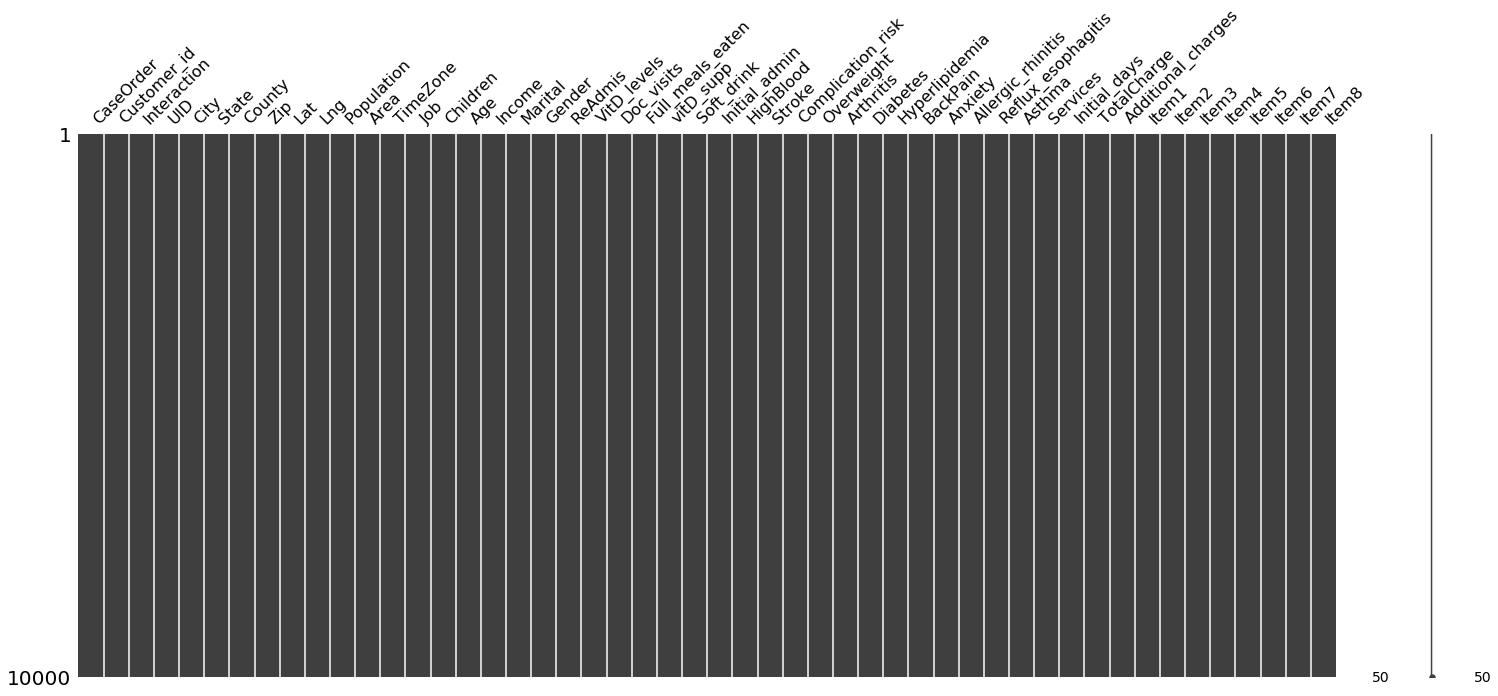

In [6]:
msno.matrix(df)

# Data Preprocessing

## Step 1, Feature Selection and Data Exploration

In [7]:
# Duplicate Check
df.duplicated().sum()

0

In [9]:
# Removing unnecessary columns
# Selecting continuous dependent features
dfs = df[['Lat','Lng','Population','Income','Doc_visits','Full_meals_eaten','Children','VitD_levels','Additional_charges','Initial_days','TotalCharge']]

dfs

,Lat,Lng,Population,Income,Doc_visits,Full_meals_eaten,Children,VitD_levels,Additional_charges,Initial_days,TotalCharge
0,34.34960,-86.72508,2951,86575.93,6,0,1,19.141466,17939.403420,10.585770,3726.702860
1,30.84513,-85.22907,11303,46805.99,4,2,3,18.940352,17612.998120,15.129562,4193.190458
2,43.54321,-96.63772,17125,14370.14,4,1,3,18.057507,17505.192460,4.772177,2434.234222
3,43.89744,-93.51479,2162,39741.49,4,1,0,16.576858,12993.437350,1.714879,2127.830423
4,37.59894,-76.88958,5287,1209.56,5,0,1,17.439069,3716.525786,1.254807,2113.073274
...,...,...,...,...,...,...,...,...,...,...,...
9995,36.42886,-78.23716,4762,45967.61,4,2,2,16.980860,8927.642000,51.561220,6850.942000
9996,39.43609,-74.87302,1251,14983.02,5,0,4,18.177020,28507.150000,68.668240,7741.690000
9997,36.36655,-87.29988,532,65917.81,4,2,3,17.129070,15281.210000,70.154180,8276.481000
9998,44.10354,-102.01590,271,29702.32,5,2,3,19.910430,7781.678000,63.356900,7644.483000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E104166488>,
      dtype=object)

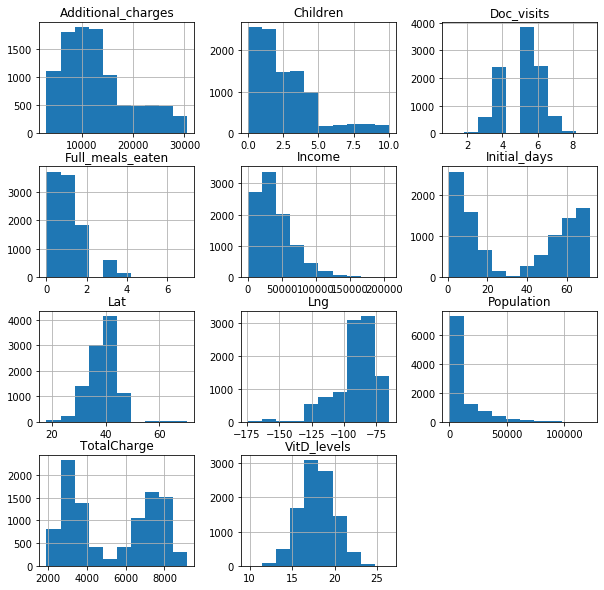

In [10]:
dfs.hist(figsize=(10,10))

In [11]:
# Outlier removal method via Z-score, Code reference (Bushmanov, 2019)

num_data = dfs.select_dtypes(include=['number'])
cat_data = dfs.select_dtypes(exclude=['number'])

In [12]:
idx = np.all(stats.zscore(num_data) <3, axis=1)

In [13]:
dfs = pd.concat([num_data.loc[idx], cat_data.loc[idx]], axis=1)

In [14]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9348 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Lat                 9348 non-null   float64
 1   Lng                 9348 non-null   float64
 2   Population          9348 non-null   int64  
 3   Income              9348 non-null   float64
 4   Doc_visits          9348 non-null   int64  
 5   Full_meals_eaten    9348 non-null   int64  
 6   Children            9348 non-null   int64  
 7   VitD_levels         9348 non-null   float64
 8   Additional_charges  9348 non-null   float64
 9   Initial_days        9348 non-null   float64
 10  TotalCharge         9348 non-null   float64
dtypes: float64(7), int64(4)
memory usage: 876.4 KB


In [15]:
dfs.corr()

,Lat,Lng,Population,Income,Doc_visits,Full_meals_eaten,Children,VitD_levels,Additional_charges,Initial_days,TotalCharge
Lat,1.000000,0.001799,-0.188077,-0.015718,0.007265,-0.001473,0.007512,-0.003017,-0.001230,-0.008648,-0.011537
Lng,0.001799,1.000000,-0.019119,-0.007951,0.002732,-0.015851,-0.013920,-0.000251,0.005215,-0.006870,-0.006136
Population,-0.188077,-0.019119,1.000000,0.000112,0.014135,-0.025150,0.006355,0.003940,-0.011665,0.004276,0.004841
Income,-0.015718,-0.007951,0.000112,1.000000,0.010590,-0.013329,0.004629,-0.015816,-0.005076,-0.009244,-0.010998
Doc_visits,0.007265,0.002732,0.014135,0.010590,1.000000,-0.004594,-0.004692,0.011534,0.014290,-0.007122,-0.004482
Full_meals_eaten,-0.001473,-0.015851,-0.025150,-0.013329,-0.004594,1.000000,-0.005257,0.031522,0.018624,-0.017448,-0.015222
Children,0.007512,-0.013920,0.006355,0.004629,-0.004692,-0.005257,1.000000,0.008875,0.015530,0.020079,0.020964
VitD_levels,-0.003017,-0.000251,0.003940,-0.015816,0.011534,0.031522,0.008875,1.000000,0.007627,-0.006622,-0.003794
Additional_charges,-0.001230,0.005215,-0.011665,-0.005076,0.014290,0.018624,0.015530,0.007627,1.000000,-0.002657,0.022870
Initial_days,-0.008648,-0.006870,0.004276,-0.009244,-0.007122,-0.017448,0.020079,-0.006622,-0.002657,1.000000,0.987653


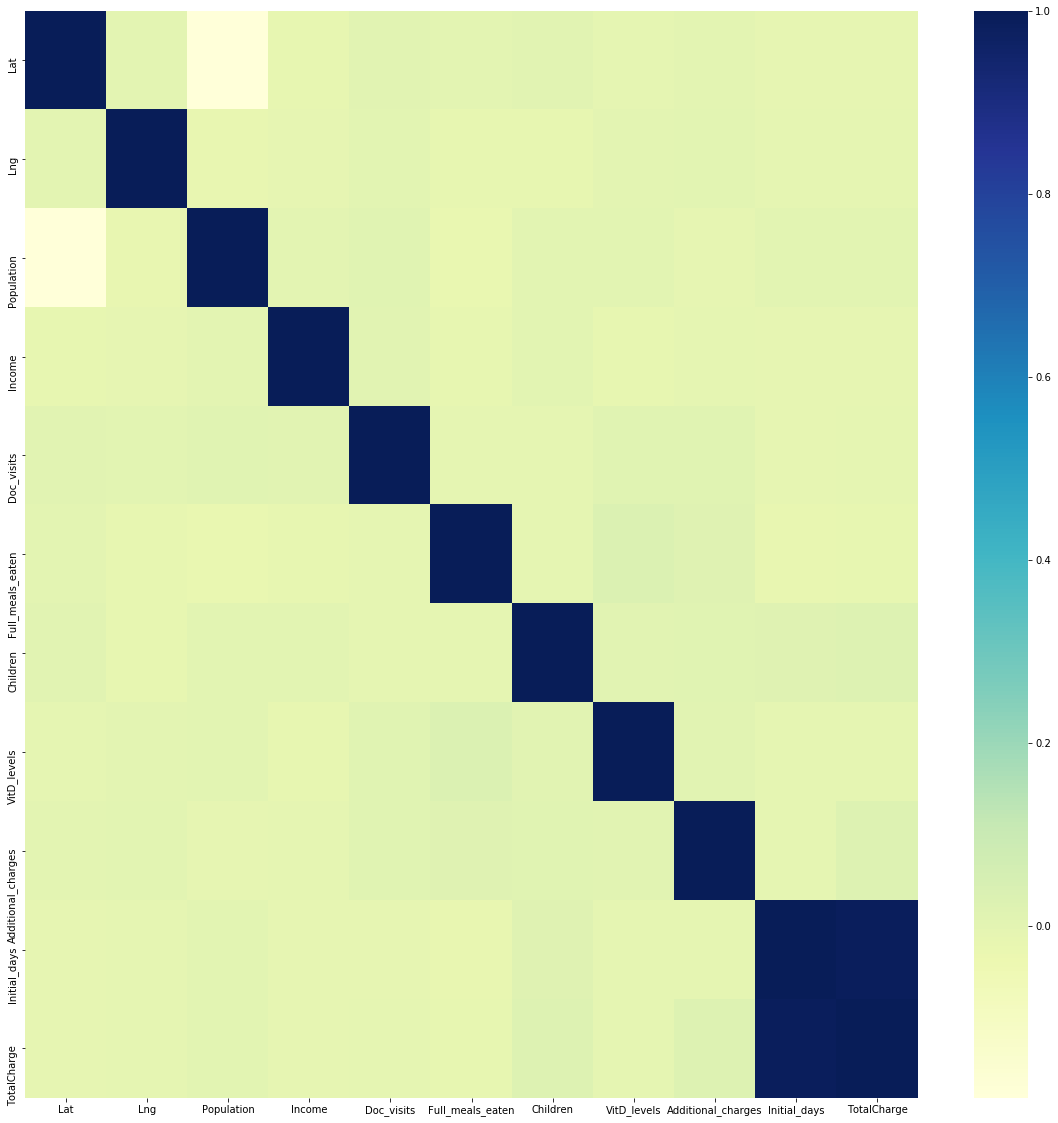

In [16]:
fig_dims = (20, 20)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(dfs.corr(), ax=ax, cmap='YlGnBu')
plt.show()

## Step 2, Check for Missing Data

In [17]:
# Check for and Handle any missing data
dfs.isnull().sum()

Lat                   0
Lng                   0
Population            0
Income                0
Doc_visits            0
Full_meals_eaten      0
Children              0
VitD_levels           0
Additional_charges    0
Initial_days          0
TotalCharge           0
dtype: int64

In [18]:
dfs.isna().sum()

Lat                   0
Lng                   0
Population            0
Income                0
Doc_visits            0
Full_meals_eaten      0
Children              0
VitD_levels           0
Additional_charges    0
Initial_days          0
TotalCharge           0
dtype: int64

In [19]:
dfs.isnull().any()

Lat                   False
Lng                   False
Population            False
Income                False
Doc_visits            False
Full_meals_eaten      False
Children              False
VitD_levels           False
Additional_charges    False
Initial_days          False
TotalCharge           False
dtype: bool

In [20]:
dfs

,Lat,Lng,Population,Income,Doc_visits,Full_meals_eaten,Children,VitD_levels,Additional_charges,Initial_days,TotalCharge
0,34.34960,-86.72508,2951,86575.93,6,0,1,19.141466,17939.403420,10.585770,3726.702860
1,30.84513,-85.22907,11303,46805.99,4,2,3,18.940352,17612.998120,15.129562,4193.190458
2,43.54321,-96.63772,17125,14370.14,4,1,3,18.057507,17505.192460,4.772177,2434.234222
3,43.89744,-93.51479,2162,39741.49,4,1,0,16.576858,12993.437350,1.714879,2127.830423
4,37.59894,-76.88958,5287,1209.56,5,0,1,17.439069,3716.525786,1.254807,2113.073274
...,...,...,...,...,...,...,...,...,...,...,...
9995,36.42886,-78.23716,4762,45967.61,4,2,2,16.980860,8927.642000,51.561220,6850.942000
9996,39.43609,-74.87302,1251,14983.02,5,0,4,18.177020,28507.150000,68.668240,7741.690000
9997,36.36655,-87.29988,532,65917.81,4,2,3,17.129070,15281.210000,70.154180,8276.481000
9998,44.10354,-102.01590,271,29702.32,5,2,3,19.910430,7781.678000,63.356900,7644.483000


# Standardization and PCA

In [21]:
from sklearn.decomposition import PCA

In [22]:
#PCA
# PCA Dimenionality Reduction Techique, Code Reference (Larose, Larose, 2019)

In [23]:
#Define variables for PCA
med = dfs[['Lat','Lng','Population','Income','Doc_visits','Full_meals_eaten','Children','VitD_levels','Additional_charges','Initial_days','TotalCharge']]

In [24]:
med

,Lat,Lng,Population,Income,Doc_visits,Full_meals_eaten,Children,VitD_levels,Additional_charges,Initial_days,TotalCharge
0,34.34960,-86.72508,2951,86575.93,6,0,1,19.141466,17939.403420,10.585770,3726.702860
1,30.84513,-85.22907,11303,46805.99,4,2,3,18.940352,17612.998120,15.129562,4193.190458
2,43.54321,-96.63772,17125,14370.14,4,1,3,18.057507,17505.192460,4.772177,2434.234222
3,43.89744,-93.51479,2162,39741.49,4,1,0,16.576858,12993.437350,1.714879,2127.830423
4,37.59894,-76.88958,5287,1209.56,5,0,1,17.439069,3716.525786,1.254807,2113.073274
...,...,...,...,...,...,...,...,...,...,...,...
9995,36.42886,-78.23716,4762,45967.61,4,2,2,16.980860,8927.642000,51.561220,6850.942000
9996,39.43609,-74.87302,1251,14983.02,5,0,4,18.177020,28507.150000,68.668240,7741.690000
9997,36.36655,-87.29988,532,65917.81,4,2,3,17.129070,15281.210000,70.154180,8276.481000
9998,44.10354,-102.01590,271,29702.32,5,2,3,19.910430,7781.678000,63.356900,7644.483000


In [25]:
# Standardize data
# Code Reference (Data normalization with pandas, 2020)
med_normalized = (med-med.mean())/med.std()

In [26]:
med_normalized

,Lat,Lng,Population,Income,Doc_visits,Full_meals_eaten,Children,VitD_levels,Additional_charges,Initial_days,TotalCharge
0,-0.862012,0.278990,-0.478865,1.876275,0.946286,-1.012064,-0.495635,0.594542,0.767523,-0.902922,-0.722294
1,-1.560337,0.384368,0.211612,0.309608,-0.966957,1.035501,0.556766,0.493908,0.717572,-0.730283,-0.508406
2,0.969970,-0.419245,0.692928,-0.968146,-0.966957,0.011719,0.556766,0.052144,0.701074,-1.123805,-1.314901
3,1.040557,-0.199269,-0.544094,0.031314,-0.966957,0.011719,-1.021835,-0.688754,0.010624,-1.239966,-1.455390
4,-0.214526,0.971792,-0.285743,-1.486584,-0.010336,-1.012064,-0.495635,-0.257315,-1.409056,-1.257446,-1.462156
...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.447684,0.876870,-0.329146,0.276581,-0.966957,1.035501,0.030566,-0.486596,-0.611580,0.653916,0.710195
9996,0.151557,1.113836,-0.619408,-0.944003,-0.010336,-1.012064,1.082967,0.111946,2.384744,1.303887,1.118610
9997,-0.460101,0.238502,-0.678849,1.062484,-0.966957,1.035501,0.556766,-0.412434,0.360730,1.360344,1.363817
9998,1.081625,-0.798078,-0.700426,-0.364162,-0.010336,1.035501,0.556766,0.979322,-0.786951,1.102086,1.074040


In [27]:
# Read out cleaned dataset
med_normalized.to_excel('C:/Users/ericy/Desktop/D212.2.xlsx', index=False)

In [28]:
pca = PCA(n_components=med_normalized.shape[1])

In [29]:
pca.fit(med_normalized)

PCA(n_components=11)

In [30]:
med_pca = pd.DataFrame(pca.transform(med_normalized),
                      columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11'])

In [31]:
loadings = pd.DataFrame(pca.components_.T,
                       columns =['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11'],
                       index=med.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Lat,-0.015930,-0.694288,-0.071949,0.081817,0.017799,0.037196,-0.134593,-0.078694,-0.050381,0.690861,0.002027
Lng,-0.009384,-0.072312,-0.157025,-0.356431,-0.606679,-0.394330,0.025417,0.474904,0.297104,0.070546,-0.000448
Population,0.010176,0.704501,0.036238,-0.018538,-0.017106,-0.045793,-0.053830,-0.073143,0.028218,0.700345,-0.000240
Income,-0.013701,0.070263,-0.293900,0.541177,-0.019915,0.365928,0.260638,0.631928,-0.093975,0.072310,0.001166
Doc_visits,-0.008338,0.028066,0.105343,0.352703,-0.635121,0.403332,-0.303991,-0.330680,0.298147,-0.083281,-0.001634
Full_meals_eaten,-0.023301,-0.088272,0.591670,-0.146195,0.190436,0.293050,0.367691,0.167477,0.569714,0.101261,-0.001194
Children,0.029611,-0.001838,0.163498,0.567260,0.252992,-0.568826,-0.329285,0.124946,0.369428,-0.050185,-0.000375
VitD_levels,-0.007585,0.005539,0.581081,-0.096957,-0.084461,0.111804,-0.493393,0.420997,-0.460952,-0.008231,-0.001796
Additional_charges,0.014191,-0.050021,0.396009,0.309482,-0.346416,-0.348171,0.575162,-0.181885,-0.370217,0.046709,-0.018194
Initial_days,0.706173,-0.013781,-0.005671,-0.015530,-0.001509,0.029184,-0.002310,0.013489,0.009127,0.005977,-0.706892


# Elbow Rule and Kaiser Criterion

In [32]:
cov_matrix = np.dot(med_normalized.T, med_normalized) / med.shape[0]

In [33]:
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

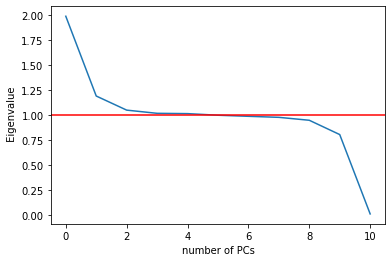

In [39]:
#Plot Elbow Graph
plt.plot(eigenvalues)
plt.xlabel('number of PCs')
plt.ylabel(' Eigenvalue')
plt.axhline(y=1, color='red')
plt.show()

In [35]:
print(eigenvalues)

[1.9897425589857693, 1.1915801373668988, 1.050470223714036, 1.0184659912104532, 1.0154827922393348, 0.9992917621580107, 0.9885689114449758, 0.9782773787132588, 0.9489950773023078, 0.8059454197926789, 0.0120030247788463]


# Explained Variance

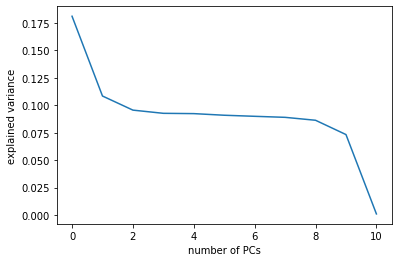

In [40]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of PCs')
plt.ylabel('explained variance')
plt.show()

In [37]:
print(pca.explained_variance_ratio_)

[0.18090504 0.10833706 0.09550751 0.09259772 0.09232649 0.09085442
 0.08987952 0.08894382 0.08628151 0.0732756  0.0010913 ]
